D:/AI/salaries.csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('D:/AI/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
inputs=df.drop('salary_more_then_100k',axis='columns')

In [5]:
target=df['salary_more_then_100k']

In [7]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [8]:
inputs['n_company'] = le_company.fit_transform(inputs['company'])
inputs['n_job'] = le_job.fit_transform(inputs['job'])
inputs['n_degree'] = le_degree.fit_transform(inputs['degree'])

In [9]:
inputs

,company,job,degree,n_company,n_job,n_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [10]:
n_inputs = inputs.drop(['company','job','degree'],axis='columns')

In [11]:
n_inputs

,n_company,n_job,n_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [12]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [14]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [16]:
model.fit(n_inputs,target)

DecisionTreeClassifier()

In [18]:
model.score(n_inputs,target)

1.0

In [19]:
feature_cols = ['n_company','n_job','n_degree']

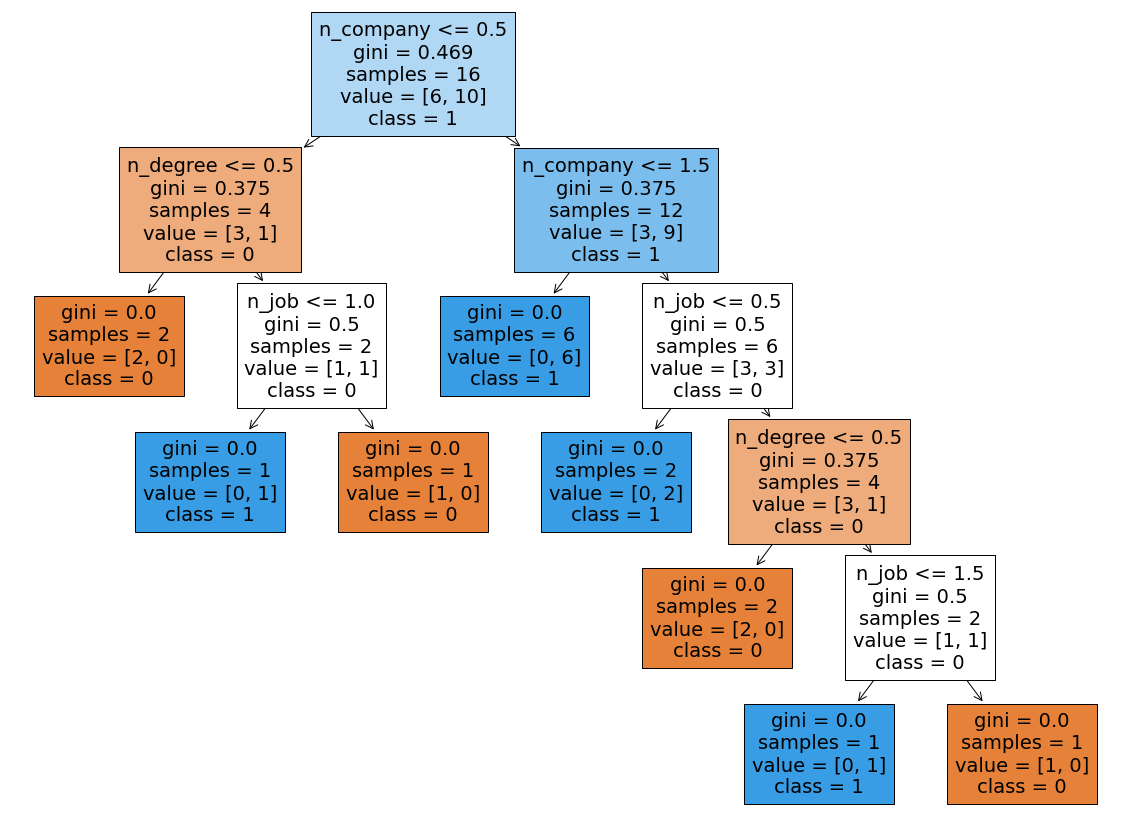

In [33]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(model,
                   feature_names=feature_cols,
                   class_names=['0','1'],
                   filled = True)

In [35]:
model.predict([[2,1,0]]) #google-computerprogrammer-bachelors -->> if 0  >100k

array([0], dtype=int64)

In [36]:
model.predict([[2,1,1]]) #google-comterprogrammer-master --> if 1 <100k

array([1], dtype=int64)